In [1]:
import pandas as pd
import numpy as np
import datetime as dt
pd.options.mode.chained_assignment = None

from matplotlib import pyplot as plt

In [19]:
od = pd.read_csv('Dajiang_processed_20200618.csv')
df = pd.DataFrame()
df['M'] = od.Measure.groupby(od.index//4).sum()
df = pd.concat([df, pd.DataFrame(np.nan, columns=[f"M+{x+1}" for x in range(24*20)], index=df.index)], axis=1)
df
for i in range(24*20):
    df[f"M+{i+1}"] = df['M'].shift(-i-1)
df

,M,M+1,M+2,M+3,M+4,M+5,M+6,M+7,M+8,M+9,...,M+471,M+472,M+473,M+474,M+475,M+476,M+477,M+478,M+479,M+480
0,372.9,386.0,390.1,389.0,375.1,368.7,370.4,377.3,430.2,428.7,...,976.0,936.1,915.2,893.5,841.4,834.8,812.5,782.9,766.6,680.4
1,386.0,390.1,389.0,375.1,368.7,370.4,377.3,430.2,428.7,449.3,...,936.1,915.2,893.5,841.4,834.8,812.5,782.9,766.6,680.4,582.3
2,390.1,389.0,375.1,368.7,370.4,377.3,430.2,428.7,449.3,463.0,...,915.2,893.5,841.4,834.8,812.5,782.9,766.6,680.4,582.3,555.0
3,389.0,375.1,368.7,370.4,377.3,430.2,428.7,449.3,463.0,458.5,...,893.5,841.4,834.8,812.5,782.9,766.6,680.4,582.3,555.0,566.9
4,375.1,368.7,370.4,377.3,430.2,428.7,449.3,463.0,458.5,463.0,...,841.4,834.8,812.5,782.9,766.6,680.4,582.3,555.0,566.9,537.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,542.3,568.3,542.3,535.2,533.3,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8756,568.3,542.3,535.2,533.3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8757,542.3,535.2,533.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8758,535.2,533.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


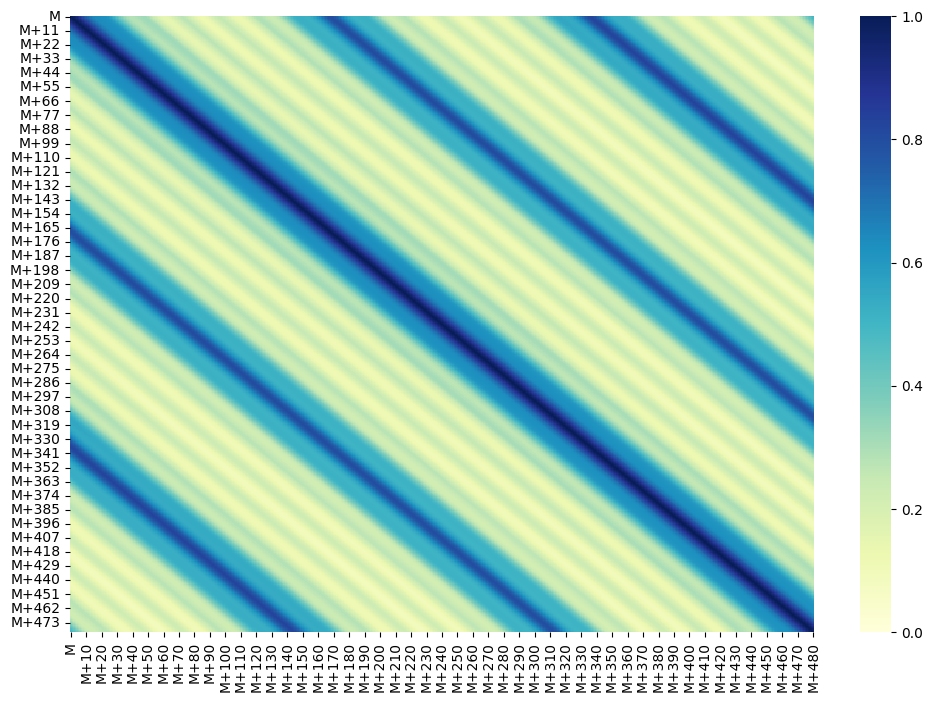

In [24]:
import seaborn as sns

plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='YlGnBu', annot=False, vmin=0, vmax=1, linewidths=0)
plt.show()

In [58]:
data = pd.read_csv('Dajiang_processed_20200618.csv')
# data
data['Date_Time'] = pd.to_datetime(data['Date_Time'], errors='coerce')
data['Minute'] = data['Date_Time'].dt.minute
data=data[['Measure']][:960]

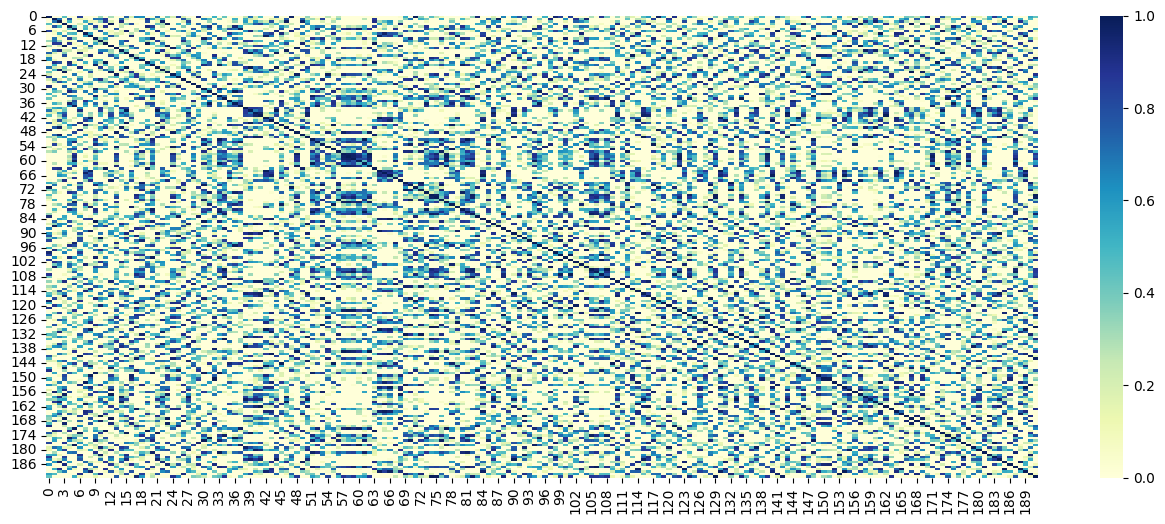

In [54]:
import seaborn as sns
df=[]
for i in range(0,len(data),4):
    temp=[]
    d=data.iloc[i:4+i].to_numpy()
    for j in d:
        temp.append(j[0])
    df.append(temp)
a=df
df=pd.DataFrame(df)
plt.figure(figsize=(16, 6))
sns.heatmap(df.T.corr(), cmap='YlGnBu', vmin=0, vmax=1)
plt.show()

In [35]:
from sklearn.metrics import pairwise_distances
a=np.array(a)
b=a
a
# distances = pairwise_distances(X=a.reshape(-1, 1), Y=b.reshape(-1, 1))
# sns.heatmap(distances, square=True, annot=False, cbar=False, cmap='Blues');

array([[106.2,  84.2,  91.1,  91.4],
       [ 94.8, 100.4,  91.3,  99.5],
       [ 92.9, 112.8,  90.5,  93.9],
       [105.3,  98.8,  99.9,  85. ],
       [ 85.6,  98.4,  90.7, 100.4],
       [ 88.2,  90.7,  95.4,  94.4],
       [102.8,  88.8,  84.9,  93.9],
       [ 90.9,  96.9,  96.3,  93.2],
       [106.8, 110. , 114.2,  99.2],
       [103.8, 107.1, 103.9, 113.9],
       [117.2, 114.6, 102.9, 114.6],
       [112. , 120.6, 113.1, 117.3],
       [121.1, 118. , 117. , 102.4],
       [114.3, 112.5, 120.3, 115.9],
       [118.6, 127.2, 109.6, 114.3],
       [115.1, 113. , 111.5, 112.9],
       [116.6, 113.8, 122. , 106.2],
       [116.1, 100.2, 117.6, 113.6],
       [109.7, 101.9, 103.6, 111.3],
       [108.7, 113.1, 109.3, 111.9],
       [101.4, 109.5, 108. , 125.4],
       [107.9, 103. ,  98.4, 101.7],
       [103.2, 106.1, 102.9, 102.4],
       [107.2, 102.7, 105. ,  92.9],
       [ 99.9,  95.8, 105.6, 101.5],
       [108.4,  96.6, 106.3, 100.6],
       [104.9, 102.6,  91.8, 109.3],
 

In [36]:
day=[]
for i in range(0,len(a),24):
    day.append(a[i:24+i])
    
day

[array([[106.2,  84.2,  91.1,  91.4],
        [ 94.8, 100.4,  91.3,  99.5],
        [ 92.9, 112.8,  90.5,  93.9],
        [105.3,  98.8,  99.9,  85. ],
        [ 85.6,  98.4,  90.7, 100.4],
        [ 88.2,  90.7,  95.4,  94.4],
        [102.8,  88.8,  84.9,  93.9],
        [ 90.9,  96.9,  96.3,  93.2],
        [106.8, 110. , 114.2,  99.2],
        [103.8, 107.1, 103.9, 113.9],
        [117.2, 114.6, 102.9, 114.6],
        [112. , 120.6, 113.1, 117.3],
        [121.1, 118. , 117. , 102.4],
        [114.3, 112.5, 120.3, 115.9],
        [118.6, 127.2, 109.6, 114.3],
        [115.1, 113. , 111.5, 112.9],
        [116.6, 113.8, 122. , 106.2],
        [116.1, 100.2, 117.6, 113.6],
        [109.7, 101.9, 103.6, 111.3],
        [108.7, 113.1, 109.3, 111.9],
        [101.4, 109.5, 108. , 125.4],
        [107.9, 103. ,  98.4, 101.7],
        [103.2, 106.1, 102.9, 102.4],
        [107.2, 102.7, 105. ,  92.9]]),
 array([[ 99.9,  95.8, 105.6, 101.5],
        [108.4,  96.6, 106.3, 100.6],
        [1

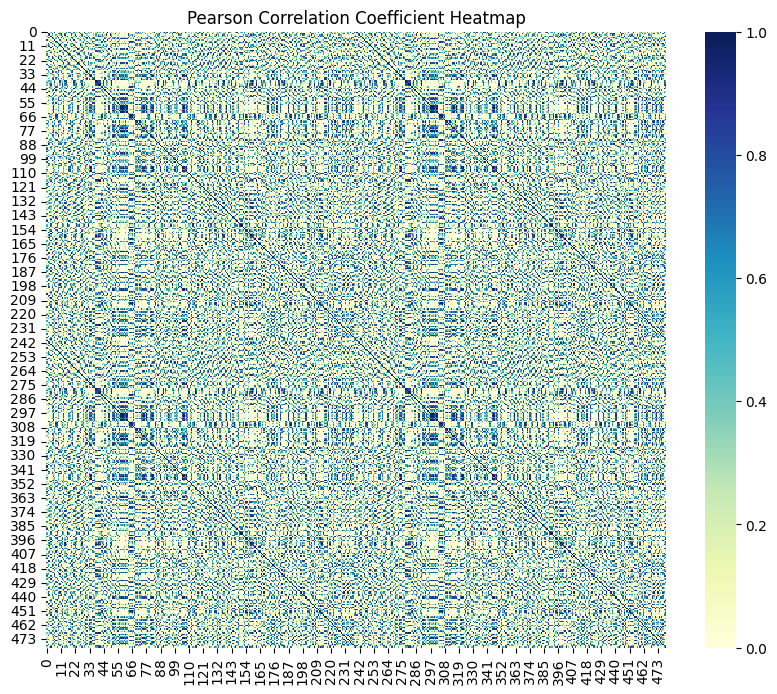

In [59]:
df=[]
for i in range(0,len(data),4):
    temp=[]
    d=data.iloc[i:4+i].to_numpy()
    for j in d:
        temp.append(j[0])
    df.append(temp)
a=df
# 將數值轉換為 NumPy 陣列
data_array = np.array(a)
data_array = data_array.T
c=data_array
# 計算皮爾森相關係數矩陣
correlation_matrix = np.corrcoef(data_array, c, rowvar=False)

# 繪製相關係數矩陣的熱力圖
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='YlGnBu', vmin=0, vmax=1)
plt.title('Pearson Correlation Coefficient Heatmap')
plt.show()